# In this file I wrote code to plot the defomation over the cardiac cycle for datasets for 4 different pathologies

The first issue is that I do not have the same number of time steps imaged for all data sets. 

In [2]:
#importing libraries
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

In [55]:
def volume_plotting(time_norm, vol_array, mean_vol, std_vol,pathology_title, bp_bool = True, savepath = None):
    # Create figure with appropriate size and spacing
    fig, ax = plt.subplots(figsize=(10, 6), dpi=100)

    # Define the exact same modern color palette
    colors = {
        'no_top': '#4B6FA5',      # Modern blue
        'all_slices': '#C10E21',  # JAHA red
        'offset': "#2E8B57",      # matching green that also colorblind people can differentiate
        'ground_truth': "#000000", # black
        'volume_mesh': "#868686"   # grey
    }

    if bp_bool:
        color_plot = colors['all_slices']
    else: 
        color_plot = colors['no_top']

    # Plot individual curves with matching styling
    for v in vol_array:
        ax.plot(time_norm * 100, v, 
                color=colors['volume_mesh'], linewidth=1, 
                alpha=0.3, zorder=1)

    # Plot mean volume line with scatter points (matching your reference style)
    line1 = ax.plot(time_norm * 100, mean_vol,
                    color=color_plot, linewidth=2.5,
                    label="Mean Volume", alpha=0.6, zorder=3)
    scatter1 = ax.scatter(time_norm * 100, mean_vol,
                        color=color_plot, s=50, alpha=0.5, 
                        linewidth=1, zorder=4)

    # Enhanced confidence interval matching your style
    ax.fill_between(time_norm * 100, mean_vol - std_vol, mean_vol + std_vol, 
                    color=color_plot, alpha=0.2, 
                    label='±1 Standard Deviation', zorder=2)

    # Beautiful labels and title with better sizing (matching your style exactly)
    ax.set_xlabel('Percentage of Cardiac Cycle [%]', fontsize=16, fontweight='bold', color='#000000')
    ax.set_ylabel('Volume [ml]', fontsize=16, fontweight='bold', color='#000000')
    ax.set_title(f'{pathology_title}', fontsize=18, fontweight='bold',
                color='#000000', pad=15)

    # Improve tick styling (matching your reference)
    ax.tick_params(axis='both', which='major', labelsize=11, colors='#000000')

    # Remove grid and clean up spines (exactly like your reference)
    ax.grid(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_color('#000000')
    ax.spines['bottom'].set_color('#000000')

    # Beautiful legend with better positioning - no border (matching your style)
    legend = ax.legend(loc='best', frameon=False, fontsize=11, title_fontsize=12)
    legend.get_title().set_fontweight('bold')

    # Add clean white background (matching your reference)
    ax.set_facecolor('#FFFFFF')

    # Use subplots_adjust for better control over spacing (exactly like your reference)
    plt.subplots_adjust(left=0.1, bottom=0.1, right=0.95, top=0.9)
    
    if savepath:
        plt.savefig(savepath, dpi = 300)

    plt.show()

In [39]:
#Lists of the names of the data sets of the 4 different pathologies

datasets_healthy = ['SCD0003701','SCD0003801','SCD0003901','SCD0004001','SCD0004101','SCD0004201','SCD0004301','SCD0004401','SCD0004501']
datasets_failure_infarct = ['SCD0000101','SCD0000201','SCD0000301','SCD0000401','SCD0000501','SCD0000601', 'SCD0000701','SCD0000801','SCD0000901','SCD0001001','SCD0001101','SCD0001201']
datasets_failure = ['SCD0001301','SCD0001401','SCD0001501','SCD0001601','SCD0001701','SCD0001801','SCD0001901','SCD0002001','SCD0002101','SCD0002201','SCD0002301','SCD0002401']
datasets_Lv = ['SCD0002501','SCD0002601','SCD0002701','SCD0002801','SCD0002901','SCD0003001','SCD0003101','SCD0003201','SCD0003301','SCD0003401','SCD0003501','SCD0003601']

# Healthy Pathologies

In [40]:
#import datasets containing volumes for the datasets in the list of one pathology

volume_dfs = []
for dataset in datasets_healthy:
    file_path = f"/data.lfpn/ibraun/Code/paper_volume_calculation/outputs_patient_data/full_result/{dataset}/mesh_analysis_data/mesh_volumes_cal.csv"
    df = pd.read_csv(file_path)
    volume_dfs.append(df)

In [59]:
# i need to interpolate the time stps to common time basis

# Normalized time base (0% to 100% cardiac cycle with 20 points)
time_norm = np.linspace(0, 1, 20)

# Interpolated volumes will be stored here
interpolated_volumes = []

for df in volume_dfs:
    volumes = df['bp_volume'].values
    n = len(volumes)
    time_original = np.linspace(0, 1, n)  # Normalize time for this subject
    f_interp = interp1d(time_original, volumes, kind='linear') #linear interpolation
    volumes_interp = f_interp(time_norm)
    interpolated_volumes.append(volumes_interp)

In [60]:
# Stack into array: shape (9, 100)
vol_array = np.vstack(interpolated_volumes)

# Compute mean and std across subjects
mean_vol = np.mean(vol_array, axis=0)
std_vol = np.std(vol_array, axis=0)

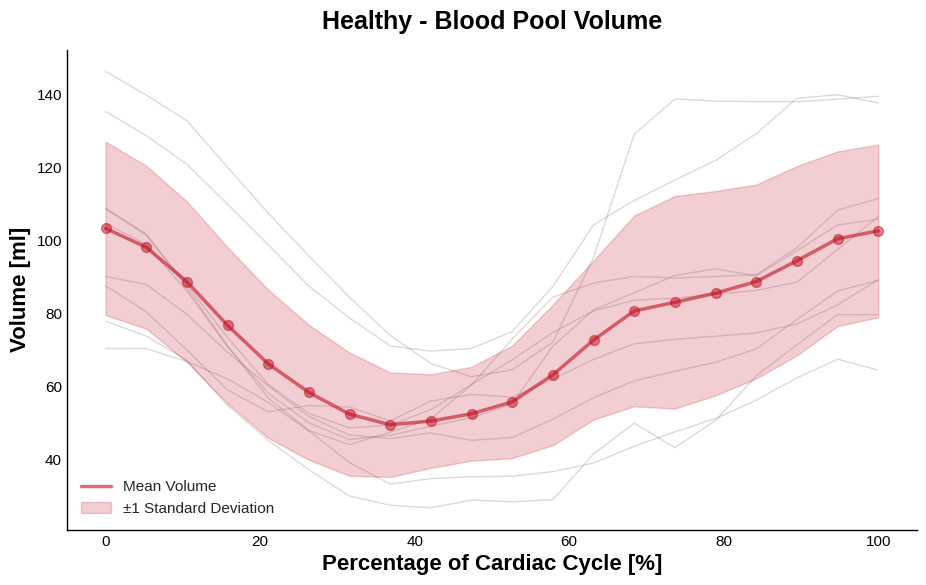

In [61]:
pathology_title = "Healthy - Blood Pool Volume"
save_path = "/data.lfpn/ibraun/Code/paper_volume_calculation/Plotting/Generated_Plots/Deformation_cardiac_cycle/Blood_Pool/deform_BP_healthy.pdf"
volume_plotting(time_norm, vol_array, mean_vol, std_vol, pathology_title, save_path)

In [65]:
# i need to interpolate the time stps to common time basis

# Normalized time base (0% to 100% cardiac cycle with 20 points)
time_norm = np.linspace(0, 1, 20)

# Interpolated volumes will be stored here
interpolated_volumes = []

for df in volume_dfs:
    volumes = df['myo_volume'].values
    n = len(volumes)
    time_original = np.linspace(0, 1, n)  # Normalize time for this subject
    f_interp = interp1d(time_original, volumes, kind='linear') #linear interpolation
    volumes_interp = f_interp(time_norm)
    interpolated_volumes.append(volumes_interp)

# Stack into array: shape (9, 100)
vol_array = np.vstack(interpolated_volumes)

# Compute mean and std across subjects
mean_vol = np.mean(vol_array, axis=0)
std_vol = np.std(vol_array, axis=0)

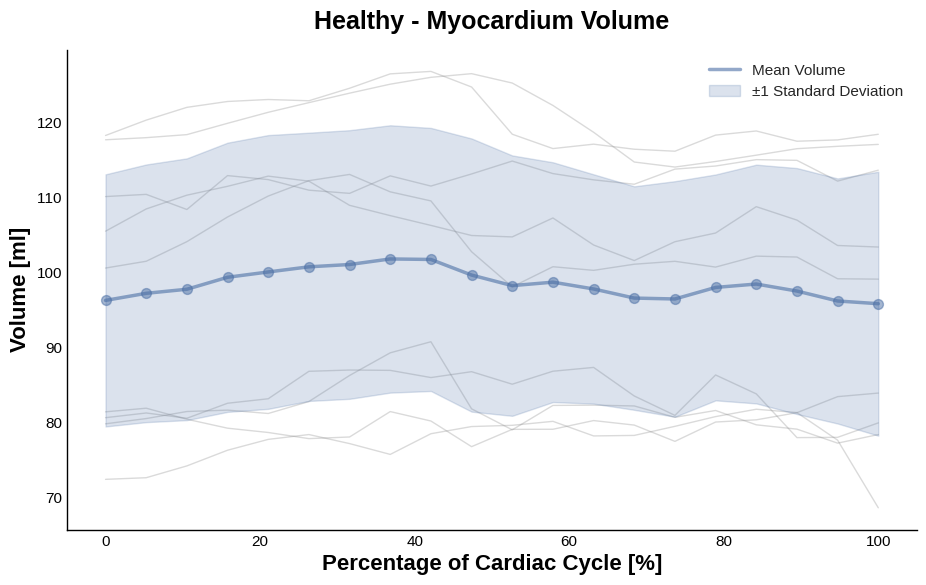

In [66]:
pathology_title = "Healthy - Myocardium Volume"
save_path = "/data.lfpn/ibraun/Code/paper_volume_calculation/Plotting/Generated_Plots/Deformation_cardiac_cycle/Myocardium/deform_MYO_healthy.pdf"
volume_plotting(time_norm, vol_array, mean_vol, std_vol, pathology_title, bp_bool = False, savepath = save_path)

# Pathology with Heart Failure and Infarct

In [67]:
#import datasets containing volumes for the datasets in the list of one pathology

volume_dfs = []
for dataset in datasets_failure_infarct:
    try:
        file_path = f"/data.lfpn/ibraun/Code/paper_volume_calculation/outputs_patient_data/full_result/{dataset}/mesh_analysis_data/mesh_volumes_cal.csv"
        df = pd.read_csv(file_path)
        volume_dfs.append(df)
    except Exception as e:
        print(f"Error in Dataset {dataset}: {e}")

Error in Dataset SCD0000601: [Errno 2] No such file or directory: '/data.lfpn/ibraun/Code/paper_volume_calculation/outputs_patient_data/full_result/SCD0000601/mesh_analysis_data/mesh_volumes_cal.csv'
Error in Dataset SCD0000801: [Errno 2] No such file or directory: '/data.lfpn/ibraun/Code/paper_volume_calculation/outputs_patient_data/full_result/SCD0000801/mesh_analysis_data/mesh_volumes_cal.csv'


In [70]:
# i need to interpolate the time stps to common time basis

# Normalized time base (0% to 100% cardiac cycle with 20 points)
time_norm = np.linspace(0, 1, 20)

# Interpolated volumes will be stored here
interpolated_volumes = []

for df in volume_dfs:
    volumes = df['bp_volume'].values
    n = len(volumes)
    time_original = np.linspace(0, 1, n)  # Normalize time for this subject
    f_interp = interp1d(time_original, volumes, kind='linear') #linear interpolation
    volumes_interp = f_interp(time_norm)
    interpolated_volumes.append(volumes_interp)
    
# Stack into array: shape (9, 100)
vol_array = np.vstack(interpolated_volumes)

# Compute mean and std across subjects
mean_vol = np.mean(vol_array, axis=0)
std_vol = np.std(vol_array, axis=0)

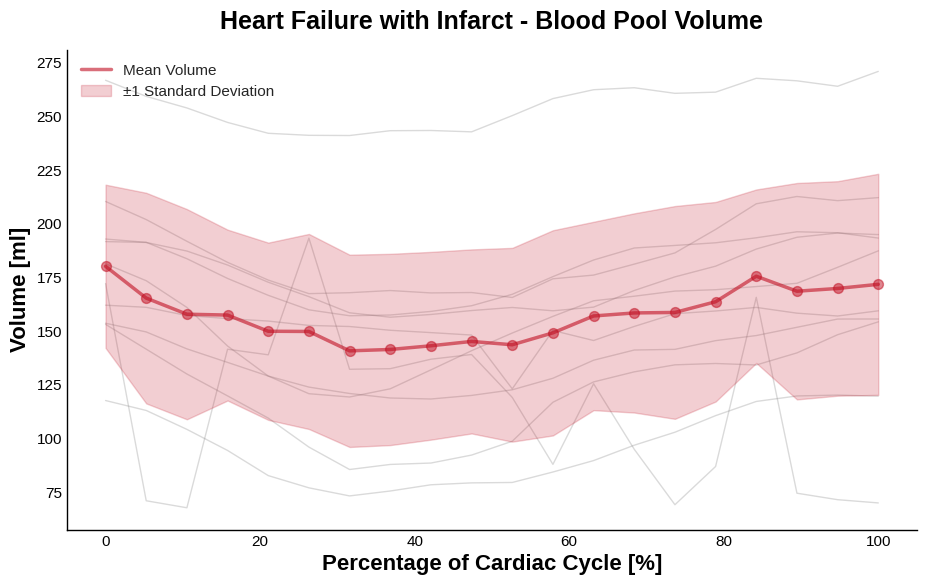

In [71]:
pathology_title = "Heart Failure with Infarct - Blood Pool Volume"
save_path = "/data.lfpn/ibraun/Code/paper_volume_calculation/Plotting/Generated_Plots/Deformation_cardiac_cycle/Blood_Pool/deform_BP_heart_failure_infarct.pdf"
volume_plotting(time_norm, vol_array, mean_vol, std_vol , pathology_title, save_path)

In [72]:
# i need to interpolate the time stps to common time basis

# Normalized time base (0% to 100% cardiac cycle with 20 points)
time_norm = np.linspace(0, 1, 20)

# Interpolated volumes will be stored here
interpolated_volumes = []

for df in volume_dfs:
    volumes = df['myo_volume'].values
    n = len(volumes)
    time_original = np.linspace(0, 1, n)  # Normalize time for this subject
    f_interp = interp1d(time_original, volumes, kind='linear') #linear interpolation
    volumes_interp = f_interp(time_norm)
    interpolated_volumes.append(volumes_interp)

# Stack into array: shape (9, 100)
vol_array = np.vstack(interpolated_volumes)

# Compute mean and std across subjects
mean_vol = np.mean(vol_array, axis=0)
std_vol = np.std(vol_array, axis=0)

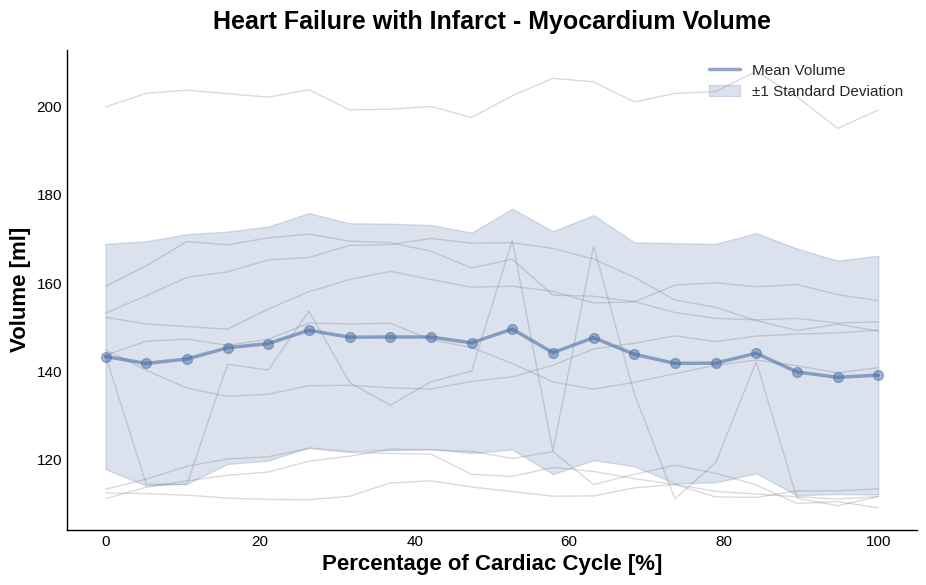

In [73]:
pathology_title = "Heart Failure with Infarct - Myocardium Volume"
save_path = "/data.lfpn/ibraun/Code/paper_volume_calculation/Plotting/Generated_Plots/Deformation_cardiac_cycle/Myocardium/deform_MYO_heart_failure_infarct.pdf"
volume_plotting(time_norm, vol_array, mean_vol, std_vol, pathology_title, bp_bool = False, savepath = save_path)

# Pathology with Heart Failure without Infarct

In [74]:
#import datasets containing volumes for the datasets in the list of one pathology

volume_dfs = []
for dataset in datasets_failure:
    try:
        file_path = f"/data.lfpn/ibraun/Code/paper_volume_calculation/outputs_patient_data/full_result/{dataset}/mesh_analysis_data/mesh_volumes_cal.csv"
        df = pd.read_csv(file_path)
        volume_dfs.append(df)
    except Exception as e:
        print(f"Error in Dataset {dataset}: {e}")

Error in Dataset SCD0001701: [Errno 2] No such file or directory: '/data.lfpn/ibraun/Code/paper_volume_calculation/outputs_patient_data/full_result/SCD0001701/mesh_analysis_data/mesh_volumes_cal.csv'


In [75]:
# i need to interpolate the time stps to common time basis

# Normalized time base (0% to 100% cardiac cycle with 20 points)
time_norm = np.linspace(0, 1, 20)

# Interpolated volumes will be stored here
interpolated_volumes = []

for df in volume_dfs:
    volumes = df['bp_volume'].values
    n = len(volumes)
    time_original = np.linspace(0, 1, n)  # Normalize time for this subject
    f_interp = interp1d(time_original, volumes, kind='linear') #linear interpolation
    volumes_interp = f_interp(time_norm)
    interpolated_volumes.append(volumes_interp)
    
# Stack into array: shape (9, 100)
vol_array = np.vstack(interpolated_volumes)

# Compute mean and std across subjects
mean_vol = np.mean(vol_array, axis=0)
std_vol = np.std(vol_array, axis=0)

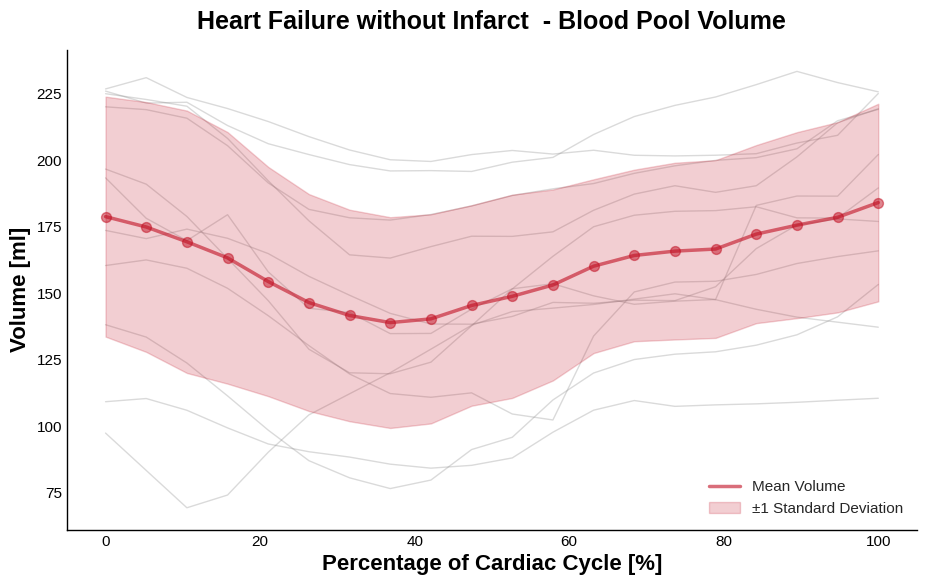

In [76]:
pathology_title = "Heart Failure without Infarct  - Blood Pool Volume"
save_path = "/data.lfpn/ibraun/Code/paper_volume_calculation/Plotting/Generated_Plots/Deformation_cardiac_cycle/Blood_Pool/deform_BP_heart_failure.pdf"
volume_plotting(time_norm, vol_array, mean_vol, std_vol, pathology_title,save_path)

In [79]:
# i need to interpolate the time stps to common time basis

# Normalized time base (0% to 100% cardiac cycle with 20 points)
time_norm = np.linspace(0, 1, 20)

# Interpolated volumes will be stored here
interpolated_volumes = []

for df in volume_dfs:
    volumes = df['myo_volume'].values
    n = len(volumes)
    time_original = np.linspace(0, 1, n)  # Normalize time for this subject
    f_interp = interp1d(time_original, volumes, kind='linear') #linear interpolation
    volumes_interp = f_interp(time_norm)
    interpolated_volumes.append(volumes_interp)
    
# Stack into array: shape (9, 100)
vol_array = np.vstack(interpolated_volumes)

# Compute mean and std across subjects
mean_vol = np.mean(vol_array, axis=0)
std_vol = np.std(vol_array, axis=0)

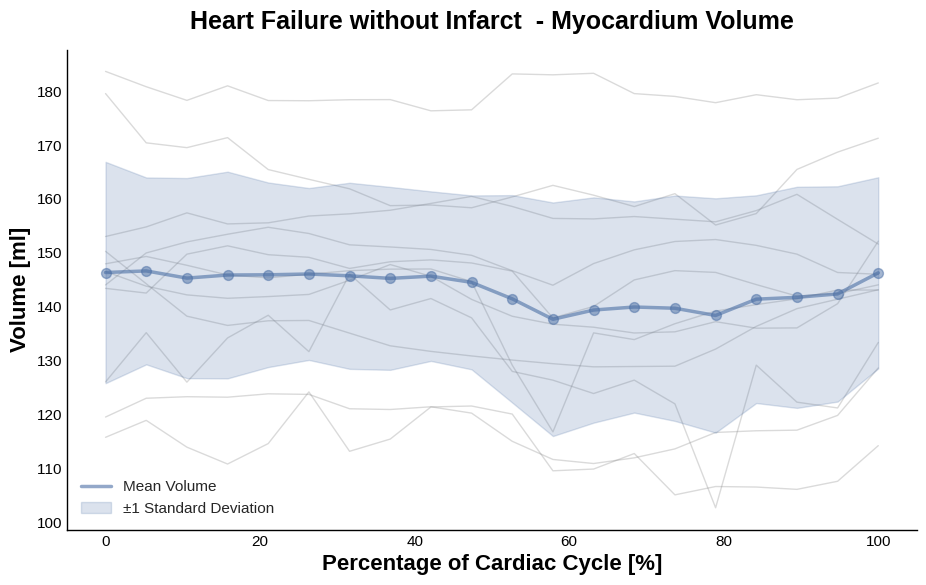

In [80]:
pathology_title = "Heart Failure without Infarct  - Myocardium Volume"
save_path = "/data.lfpn/ibraun/Code/paper_volume_calculation/Plotting/Generated_Plots/Deformation_cardiac_cycle/Myocardium/deform_MYO_heart_failure.pdf"
volume_plotting(time_norm, vol_array, mean_vol, std_vol, pathology_title,bp_bool=False, savepath= save_path)

# Pathology LV Hypertrophy

In [81]:
#import datasets containing volumes for the datasets in the list of one pathology

volume_dfs = []
for dataset in datasets_Lv:
    try:
        file_path = f"/data.lfpn/ibraun/Code/paper_volume_calculation/outputs_patient_data/full_result/{dataset}/mesh_analysis_data/mesh_volumes_cal.csv"
        df = pd.read_csv(file_path)
        volume_dfs.append(df)
    except Exception as e:
        print(f"Error in Dataset {dataset}: {e}")

Error in Dataset SCD0002601: [Errno 2] No such file or directory: '/data.lfpn/ibraun/Code/paper_volume_calculation/outputs_patient_data/full_result/SCD0002601/mesh_analysis_data/mesh_volumes_cal.csv'
Error in Dataset SCD0002701: [Errno 2] No such file or directory: '/data.lfpn/ibraun/Code/paper_volume_calculation/outputs_patient_data/full_result/SCD0002701/mesh_analysis_data/mesh_volumes_cal.csv'
Error in Dataset SCD0002801: [Errno 2] No such file or directory: '/data.lfpn/ibraun/Code/paper_volume_calculation/outputs_patient_data/full_result/SCD0002801/mesh_analysis_data/mesh_volumes_cal.csv'
Error in Dataset SCD0003101: [Errno 2] No such file or directory: '/data.lfpn/ibraun/Code/paper_volume_calculation/outputs_patient_data/full_result/SCD0003101/mesh_analysis_data/mesh_volumes_cal.csv'
Error in Dataset SCD0003301: [Errno 2] No such file or directory: '/data.lfpn/ibraun/Code/paper_volume_calculation/outputs_patient_data/full_result/SCD0003301/mesh_analysis_data/mesh_volumes_cal.csv'


In [82]:
# i need to interpolate the time stps to common time basis

# Normalized time base (0% to 100% cardiac cycle with 20 points)
time_norm = np.linspace(0, 1, 20)

# Interpolated volumes will be stored here
interpolated_volumes = []

for df in volume_dfs:
    volumes = df['bp_volume'].values
    n = len(volumes)
    time_original = np.linspace(0, 1, n)  # Normalize time for this subject
    f_interp = interp1d(time_original, volumes, kind='linear') #linear interpolation
    volumes_interp = f_interp(time_norm)
    interpolated_volumes.append(volumes_interp)
    
# Stack into array: shape (9, 100)
vol_array = np.vstack(interpolated_volumes)

# Compute mean and std across subjects
mean_vol = np.mean(vol_array, axis=0)
std_vol = np.std(vol_array, axis=0)

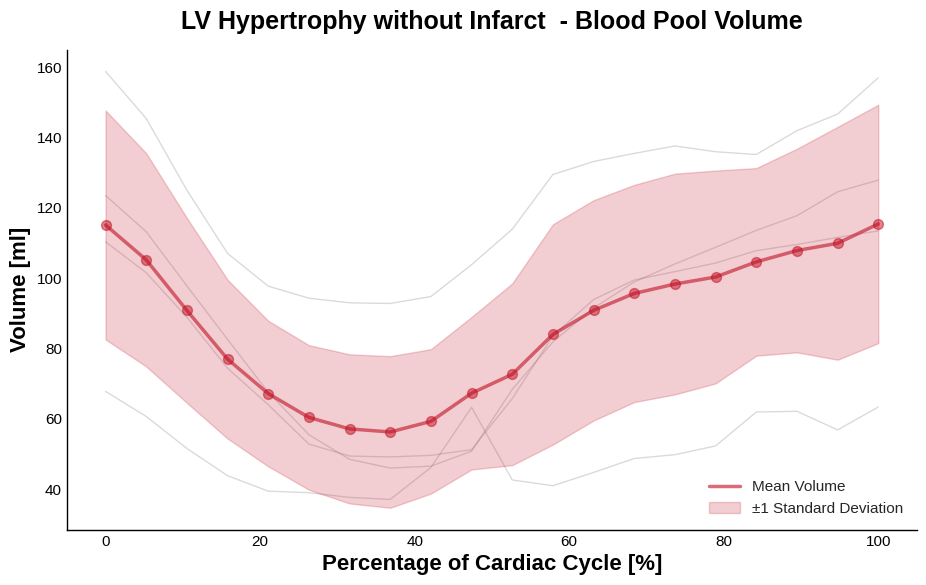

In [83]:
pathology_title = "LV Hypertrophy without Infarct  - Blood Pool Volume"
save_path = "/data.lfpn/ibraun/Code/paper_volume_calculation/Plotting/Generated_Plots/Deformation_cardiac_cycle/Blood_Pool/deform_BP_LV_hypertrophy.pdf"
volume_plotting(time_norm, vol_array, mean_vol, std_vol, pathology_title,save_path)

In [84]:
# i need to interpolate the time stps to common time basis

# Normalized time base (0% to 100% cardiac cycle with 20 points)
time_norm = np.linspace(0, 1, 20)

# Interpolated volumes will be stored here
interpolated_volumes = []

for df in volume_dfs:
    volumes = df['myo_volume'].values
    n = len(volumes)
    time_original = np.linspace(0, 1, n)  # Normalize time for this subject
    f_interp = interp1d(time_original, volumes, kind='linear') #linear interpolation
    volumes_interp = f_interp(time_norm)
    interpolated_volumes.append(volumes_interp)
    
# Stack into array: shape (9, 100)
vol_array = np.vstack(interpolated_volumes)

# Compute mean and std across subjects
mean_vol = np.mean(vol_array, axis=0)
std_vol = np.std(vol_array, axis=0)

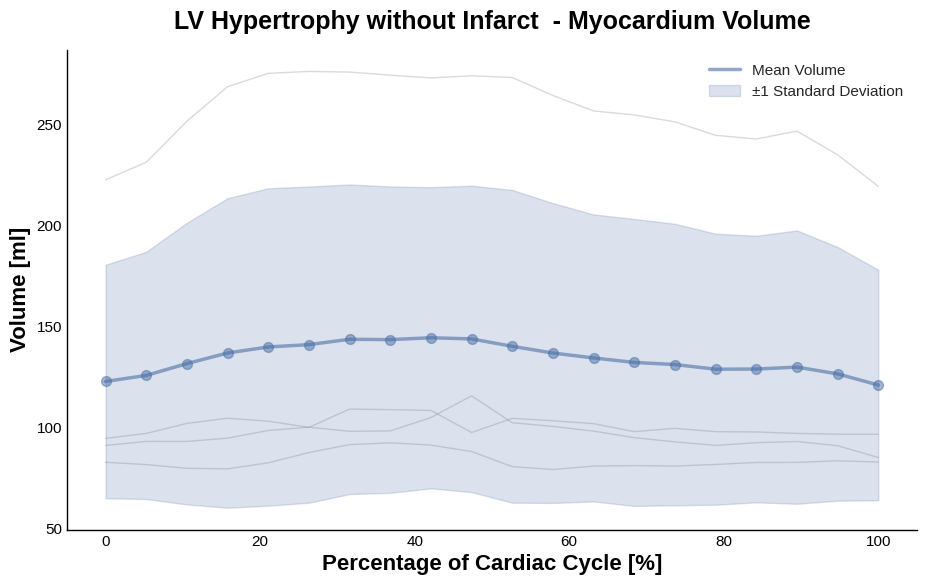

In [85]:
pathology_title = "LV Hypertrophy without Infarct  - Myocardium Volume"
save_path = "/data.lfpn/ibraun/Code/paper_volume_calculation/Plotting/Generated_Plots/Deformation_cardiac_cycle/Myocardium/deform_MYO_LV_hypertrophy.pdf"
volume_plotting(time_norm, vol_array, mean_vol, std_vol, pathology_title,bp_bool=False, savepath=save_path)